# Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Reading the Data from the Given Dataframe

In [2]:
header_names = ['YEAR','Rainfall in June']
data = pd.read_csv('data.csv', usecols=header_names)


In [3]:
data.info()
print(f'\nContents of the dataframe:\n')
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              117 non-null    int64  
 1   Rainfall in June  113 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.0 KB

Contents of the dataframe:

     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]


The data has 117 rows out of which 4 rows are empty

# Displaying the Statistics of the given dataset

In [4]:
data.describe()

,YEAR,Rainfall in June
count,117.000000,113.000000
mean,1958.606838,72.957522
std,33.389023,35.968989
min,1901.000000,17.700000
25%,1930.000000,48.500000
50%,1959.000000,69.900000
75%,1987.000000,90.600000
max,2015.000000,161.000000


## Filling the missing values with the mean of the data = 72.957522


In [5]:
data['Rainfall in June'].fillna(data['Rainfall in June'].mean(),inplace=True)
print(data)

     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[117 rows x 2 columns]


## Dropping duplicates

In [6]:
data.drop_duplicates(inplace=True)
print(data)

     YEAR  Rainfall in June
0    1901              22.7
1    1902              59.9
2    1903              26.2
3    1904              53.4
4    1905              23.1
..    ...               ...
112  2011             119.5
113  2012              21.7
114  2013             155.0
115  2014              31.3
116  2015              90.6

[115 rows x 2 columns]


In [7]:
print(data.isnull().sum())

YEAR                0
Rainfall in June    0
dtype: int64


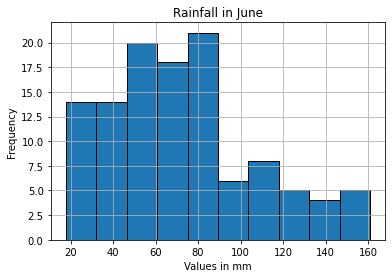

In [8]:
# Create a histogram plot
plt.hist(data['Rainfall in June'],edgecolor='black')
plt.title('Rainfall in June')
plt.xlabel('Values in mm')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# The distribution is skewed to the right
## This is confirmed by the fact that:
mean(72.957522) > median(69.900000)


In [9]:
# Statistics of data
mean_rain = data['Rainfall in June'].mean()
stddev_rain = np.sqrt(data['Rainfall in June'].var())
min_rain = data['Rainfall in June'].min()
max_rain = data['Rainfall in June'].max()
minmax_rain = max_rain - min_rain
mean_year = data['YEAR'].mean()
stddev_year = np.sqrt(data['YEAR'].var())
min_year = data['YEAR'].min()
max_year = data['YEAR'].max()
minmax_year = max_year - min_year



In [10]:
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data)
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)

# Scaling the dataset


In [11]:
print("Original Data:")
print("Year\nMin:", data.min()[0], "\nMax:", data.max()[0])
print("Rainfall in June\nMin:", data.min()[1], "\nMax:", data.max()[1])

print("\nData after Standard Scaling:")
print("Year\nMin:", np.min(data_standard_scaled[:, 0]), "\nMax:", np.max(data_standard_scaled[:, 0]))
print("Rainfall in June\nMin:", np.min(data_standard_scaled[:, 1]), "\nMax:", np.max(data_standard_scaled[:, 1]))

print("\nData after Min-Max Scaling:")
print("Year\nMin:", np.min(data_minmax_scaled[:, 0]), "\nMax:", np.max(data_minmax_scaled[:, 0]))
print("Rainfall in June\nMin:", np.min(data_minmax_scaled[:, 1]), "\nMax:", np.max(data_minmax_scaled[:, 1]))

Original Data:
Year
Min: 1901.0 
Max: 2015.0
Rainfall in June
Min: 17.7 
Max: 161.0

Data after Standard Scaling:
Year
Min: -1.7170544144170172 
Max: 1.7170544144170172
Rainfall in June
Min: -1.5642570781729244 
Max: 2.5394825812129214

Data after Min-Max Scaling:
Year
Min: 0.0 
Max: 1.0
Rainfall in June
Min: 0.0 
Max: 0.9999999999999999


# Linear Regression




## Regression on Original Data

In [12]:
X = data['YEAR'].values.reshape((-1,1))
y = data['Rainfall in June']

Mean Squared Error(MSE): 1154.308249373061
Root Mean Squared Error(RMSE): 33.97511220545211
Mean Absolute Error(MAE): 24.389468072470223


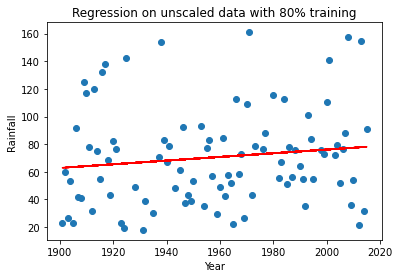

In [13]:
# Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
# Build and train the Linear Regression model
model = LinearRegression()
# Build and train the Linear Regression model
model.fit(X_train, y_train)

# Make predictions on the test and train set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Mean Squared Error(MSE): {mse}')
print(f'Root Mean Squared Error(RMSE): {np.sqrt(mse)}')
print("Mean Absolute Error(MAE):", mae)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color='red')
plt.title('Regression on unscaled data with 80% training')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

Mean Squared Error(MSE): 1159.2874484601118
Root Mean Squared Error(RMSE): 34.04831050816048
Mean Absolute Error(MAE): 24.574715287300346


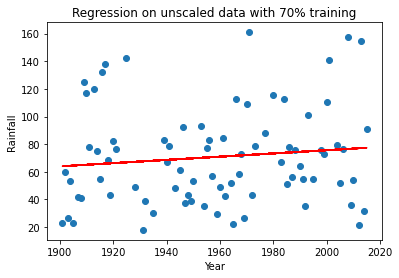

In [14]:
# Split the data into training and testing sets using the 70-30 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test and train set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Mean Squared Error(MSE): {mse}')
print(f'Root Mean Squared Error(RMSE): {np.sqrt(mse)}')
print("Mean Absolute Error(MAE):", mae)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color='red')
plt.title('Regression on unscaled data with 70% training')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

## Regression on Standard Scaled Data

In [15]:
X = data_standard_scaled[:,0].reshape(-1,1)
y = data_standard_scaled[:,1]

Mean Squared Error(MSE): 0.9466490892519815
Root Mean Squared Error(RMSE): 0.972958935028597
Mean Absolute Error(MAE): 0.698450993721709


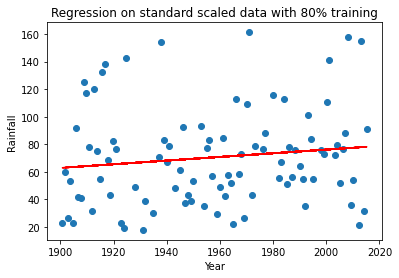

In [16]:
# Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test and train set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Mean Squared Error(MSE): {mse}')
print(f'Root Mean Squared Error(RMSE): {np.sqrt(mse)}')
print("Mean Absolute Error(MAE):", mae)

X_train_original = (X_train * stddev_year)+mean_year
y_train_original = (y_train * stddev_rain)+mean_rain
y_train_pred_original = (y_train_pred * stddev_rain)+mean_rain


plt.scatter(X_train_original, y_train_original)
plt.plot(X_train_original, y_train_pred_original, color='red')
plt.title('Regression on standard scaled data with 80% training')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

Mean Squared Error(MSE): 0.9507325342793566
Root Mean Squared Error(RMSE): 0.975055144224857
Mean Absolute Error(MAE): 0.703755992621145


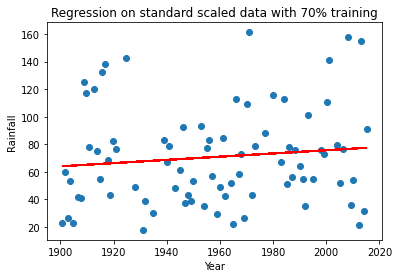

In [17]:
# Split the data into training and testing sets using the 70-30 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test and train set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Mean Squared Error(MSE): {mse}')
print(f'Root Mean Squared Error(RMSE): {np.sqrt(mse)}')
print("Mean Absolute Error(MAE):", mae)

X_train_original = (X_train * stddev_year)+mean_year
y_train_original = (y_train * stddev_rain)+mean_rain
y_train_pred_original = (y_train_pred * stddev_rain)+mean_rain

plt.scatter(X_train_original, y_train_original)
plt.plot(X_train_original, y_train_pred_original, color='red')
plt.title('Regression on standard scaled data with 70% training')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

## Regression on MinMax Scaled Data

In [18]:
X = data_minmax_scaled[:,0].reshape(-1,1)
y = data_minmax_scaled[:,1]

Mean Squared Error(MSE): 0.056212049315728534
Root Mean Squared Error(RMSE): 0.23709080394593235
Mean Absolute Error(MAE): 0.17019866065924788


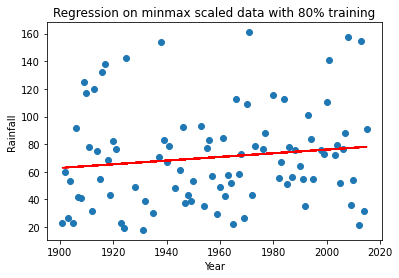

In [19]:
# Split the data into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test and train set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Mean Squared Error(MSE): {mse}')
print(f'Root Mean Squared Error(RMSE): {np.sqrt(mse)}')
print("Mean Absolute Error(MAE):", mae)

X_train_original = (X_train * minmax_year)+min_year
y_train_original = (y_train * minmax_rain)+min_rain
y_train_pred_original = (y_train_pred * minmax_rain)+min_rain


plt.scatter(X_train_original, y_train_original)
plt.plot(X_train_original, y_train_pred_original, color='red')
plt.title('Regression on minmax scaled data with 80% training')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

Mean Squared Error(MSE): 0.056454524395315064
Root Mean Squared Error(RMSE): 0.23760160857055465
Mean Absolute Error(MAE): 0.17149138372156555


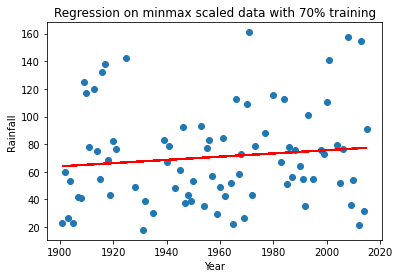

In [20]:
# Split the data into training and testing sets using the 70-30 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test and train set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

# Print the evaluation metrics
print(f'Mean Squared Error(MSE): {mse}')
print(f'Root Mean Squared Error(RMSE): {np.sqrt(mse)}')
print("Mean Absolute Error(MAE):", mae)

X_train_original = (X_train * minmax_year)+min_year
y_train_original = (y_train * minmax_rain)+min_rain
y_train_pred_original = (y_train_pred * minmax_rain)+min_rain

plt.scatter(X_train_original, y_train_original)
plt.plot(X_train_original, y_train_pred_original, color='red')
plt.title('Regression on minmax scaled data with 70% training')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()